In [1]:
from isotree import IsolationForest
import numpy as np
import h5py
import matplotlib.pyplot as plt
from func import load_model, save_model
from joblib import dump, load

2024-05-27 15:02:22.301723: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 15:02:22.341487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#import the data
filename = 'final_form_bkg.h5'

with h5py.File(filename, 'r') as file:
    X_train = np.array(file['X_train'])
    X_test = np.array(file['X_test'])
    X_val = np.array(file['X_val'])

In [3]:
with h5py.File("extended_signal_data.h5", 'r') as file:
    signal =  np.array(np.transpose(file['extended_sig']))

In [4]:
#train model
model = IsolationForest(ntrees=100).fit(X_train)
score_xtest = model.predict(X_test, output='score')
score_signal = model.predict(signal, output='score')

In [5]:
dump(model, 'isolation_forest_model.joblib')

['isolation_forest_model.joblib']

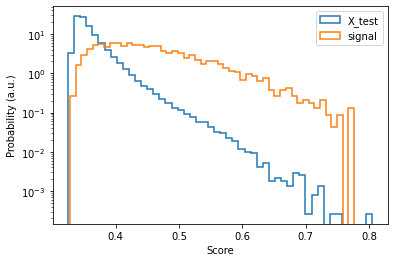

In [13]:
plt.figure()
for score, label in zip([score_xtest, score_signal], ["X_test", "signal"]):
     plt.hist(score, bins=50, label=label, density = True, histtype='step', fill=False, linewidth=1.5)
plt.yscale('log')
plt.xlabel("Score")
plt.ylabel("Probability (a.u.)")
plt.legend(loc='best')
#plt.savefig("First training_16_8_nodes")
plt.show()

In [14]:
from sklearn.metrics import roc_curve, auc

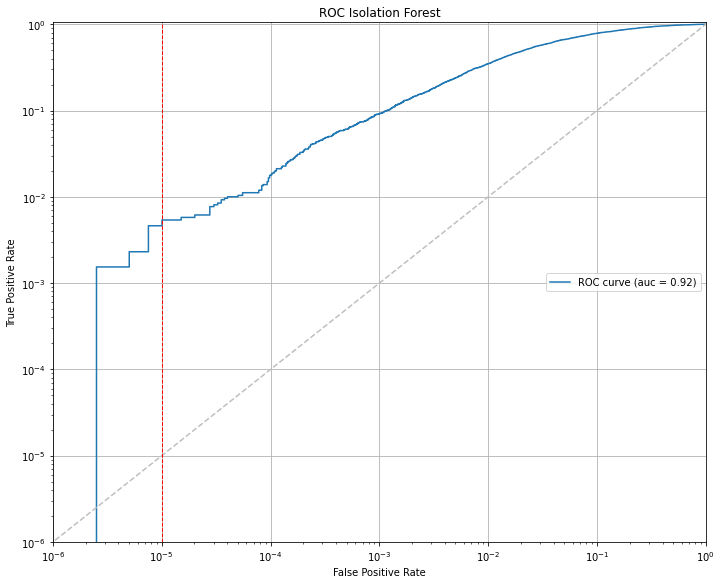

In [15]:
# Create labels for the test and signal data

y_test = np.zeros(X_test.shape[0])
y_signal = np.ones(signal.shape[0])

# Combine the scores and the labels
scores = np.concatenate([score_xtest, score_signal])
y_true = np.concatenate([y_test, y_signal])

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, scores)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, "-", lw=1.5, label='ROC curve (auc = %0.2f)' % roc_auc)
plt.semilogx()
plt.semilogy()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='center right')
plt.grid(True)
plt.tight_layout()
plt.title('ROC Isolation Forest')
plt.plot(np.linspace(0, 1),np.linspace(0, 1), '--', color='0.75')
plt.axvline(0.00001, color='red', linestyle='dashed', linewidth=1) # threshold value for measuring anomaly detection efficiency
plt.xlim([10**(-6), 1])
plt.ylim([10**(-6), 1.05])
plt.savefig("tree_roc.png")
plt.show()

In [16]:
print(score_signal.shape[0])

2598
